In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
import pandas as pd
import re #for regular expressions 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
#load the small english model for spacy
import spacy 
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
#set pandas to display full text for better inspection
pd.set_option('display.max_colwidth', None)

#load the dataset from the csv file 

try:
    df=pd.read_csv('IMDb dataset movies.csv')
except FileNotFoundError:
     print("Errot: 'IMDb dataset movies.csv' not found. Make sure it's downloaded")

#Display the first 5 rows and some info

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [40]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [41]:
print("\Sentiment Distribution:")
print(df['sentiment'].value_counts())

\Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_4376\1526411202.py:1: SyntaxWarning: invalid escape sequence '\S'
  print("\Sentiment Distribution:")


In [42]:
stop_words = set(stopwords.words('english'))
stop_words










{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [43]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [44]:
print("preprocessing all 50,000 reviews...(This may take a while)")
df = df.sample(500).copy() #use .copy() to avoid warning

df['cleaned_review'] = df['review'].apply(preprocess_text)
print("preprocessing complete")
# display a comparison of original vs cleaned reviews
print("\ncomparing original vs cleaned reviews:")
display(df[['review','cleaned_review']].head())



   

preprocessing all 50,000 reviews...(This may take a while)
preprocessing complete

comparing original vs cleaned reviews:


,review,cleaned_review
47120,"I had never read Gary Paulsen's novel, Hatchet, for which 'A Cry in the Wild' is the adaptation of, so I can't make any comparisons to the book. I will, however, say that as a film on its own, adaptation or no adaptation, it was an underdeveloped adventure that provides no major explanation of its few characters.<br /><br />Think of 'A Cry in the Wild' as a less luxurious, teenage mountaineer (was Quincy, California the only place this was filmed?) version of 'Cast Away.' Jared Rushton is 13-year-old Brian Roebson, a kid headed on a small plane to visit his father, until the craft crashes over some deserted mountain terrain, leaving the kid stranded for quite a while and having to defend himself.<br /><br />There are basically three parts to the film. The obvious being the ten or fifteen minute introduction of the characters, namely Brian and his mom. <br /><br />The next third of the movie (which really consumes nearly all of the film) is that of Brian ""roughing it."" These scenes contain no particularly amazing action, nothing spectacular other than lots of beautiful cinematography of a beautiful Yukon landscape. Nothing to put you on edge, no real encounters (except a brisk confrontation with a cub), and no major dilemmas to initiate some sort of enjoyment or connection with the character on the screen. You might even feel briefly bored with the passage of time as we witness Brian dealing with his situation through first, primitive means, and then more improved ones (using tools, etc) for his survival. It is more like the ordinary time that passes if you were actually stuck in the situation, and that is pretty much about it. In other words, they put no meat on the Paulsen's words when they translated them into a visual media.<br /><br />And, of course, the third part of the movie is his rescue.<br /><br />There is a subplot that continuously seeks to make itself known during this time, however. Some conflict between Brian and his parents that created a rocky, awkward relationship between them. However, for the most part, it is only explained in brief, intermittent, minimal dialog flashbacks that look more like a back story for a music video. Any minute, the singer from Jefferson Starship, should chime in an start singing 'Sara.' Other than what the viewer can draw from the implications, or guess for his own need to fill the gaps in the narrative, we get a very underdeveloped back story which was probably necessary to enjoy at least part of this film and create a connection to the characters, whether or not it really had anything to do with Brian's survival adventure in the third part of the movie. These are the flaws in the narrative that through the viewer into a stupor as he struggles to find out what the heck those people there on the screen are doing and, for me, almost done to the point of screaming at the television to say something and tell me more! <br /><br />It certainly was not, for me, a good adventure tale. But, for fans of Jared Rushton, it was one of the last few movies he made. So, watch it purely for nostalgia, if nothing else.",never read gary paulsen novel hatchet cry wild adaptation can not make comparison book however say film adaptation adaptation underdeveloped adventure provide major explanation charactersthink cry wild less luxurious teenage mountaineer quincy california place film version cast away jar rushton yearold brian roebson kid head small plane visit father craft crash deserted mountain terrain leave kid strand quite defend himselfthere basically three part film obvious ten fifteen minute introduction character namely brian mom next third movie really consume nearly film brian roughing scene contain particularly amazing action nothing spectacular lot beautiful cinematography beautiful yukon landscape nothing put edge real encounter except brisk confrontation cub major dilemma initiate sort enjoyment connection character screen might even feel briefly bored pas

In [45]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [46]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [47]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [48]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [49]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [50]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [52]:
from sklearn.model_selection import train_test_split

# Print unique sentiment values to debug unexpected labels
print('Unique sentiment values:', df['sentiment'].unique())

# Map sentiment labels to 0 and 1
df['sentiment_numeric'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Drop rows with NaN in 'sentiment_numeric'
df = df.dropna(subset=['sentiment_numeric'])

# Define our features (X) and target (y)
X = df['cleaned_review']
y = df['sentiment_numeric']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the train/test split has the same proportion of sentiments as the original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Unique sentiment values: ['negative' 'positive']
Training set size: 400
Testing set size: 100


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [56]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Matplotlib is building the font cache; this may take a moment.


Model Accuracy: 0.7600

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.67      0.74        52
    Positive       0.71      0.85      0.77        48

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



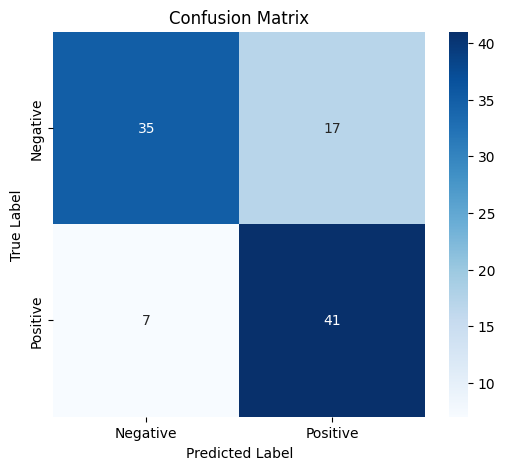

In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()